<a href="https://colab.research.google.com/github/2walkingfish/snow-activity-exploration/blob/main/Snow_instability_data_explaration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

In [4]:
df_features = pd.read_csv('/content/StevensPass-GraceLakes_4790_feet_2019.csv')
print(df_features.head())

    Date/Time (PST)  Temperature (deg F)  Relative Humidity (%)  \
0  25-06-2019 15:00                47.33                  89.90   
1  25-06-2019 14:00                53.80                  69.82   
2  25-06-2019 13:00                55.02                  65.32   
3  25-06-2019 12:00                56.62                  54.77   
4  25-06-2019 11:00                54.93                  58.87   

   Total Snow Depth (")  Intermittent/Shot Snow (")  
0                 16.46                     -7999.0  
1                 10.02                     -7999.0  
2                 12.31                     -7999.0  
3                 11.77                     -7999.0  
4                 12.12                     -7999.0  


**Statistical exploration**

In [5]:
print(df_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4216 entries, 0 to 4215
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date/Time (PST)             4216 non-null   object 
 1   Temperature (deg F)         4216 non-null   float64
 2   Relative Humidity (%)       4216 non-null   float64
 3   Total Snow Depth (")        4216 non-null   float64
 4   Intermittent/Shot Snow (")  4216 non-null   float64
dtypes: float64(4), object(1)
memory usage: 164.8+ KB
None


In [6]:
print(df_features.describe(include='all'))

         Date/Time (PST)  Temperature (deg F)  Relative Humidity (%)  \
count               4216          4216.000000            4216.000000   
unique              4216                  NaN                    NaN   
top     18-03-2019 23:00                  NaN                    NaN   
freq                   1                  NaN                    NaN   
mean                 NaN            33.505245              81.600569   
std                  NaN            12.387051              19.137084   
min                  NaN             3.482000              10.100000   
25%                  NaN            24.777500              71.257500   
50%                  NaN            32.870000              89.050000   
75%                  NaN            41.470000              96.100000   
max                  NaN            76.240000             100.000000   

        Total Snow Depth (")  Intermittent/Shot Snow (")  
count            4216.000000                 4216.000000  
unique           

**Ascending data sort by data**

In [7]:
df_features['Date/Time (PST)'] = pd.to_datetime(df_features['Date/Time (PST)'])
df_features.sort_values(by=['Date/Time (PST)'], ascending=True,inplace = True)
df_features.reset_index(drop=True, inplace = True)
print(df_features['Date/Time (PST)'])

0      2019-01-01 00:00:00
1      2019-01-01 01:00:00
2      2019-01-01 02:00:00
3      2019-01-01 03:00:00
4      2019-01-01 04:00:00
               ...        
4211   2019-12-06 19:00:00
4212   2019-12-06 20:00:00
4213   2019-12-06 21:00:00
4214   2019-12-06 22:00:00
4215   2019-12-06 23:00:00
Name: Date/Time (PST), Length: 4216, dtype: datetime64[ns]


**Visual feature exploration**

In [8]:
def plot_time_series(cl_time, cl_feature,time_from, time_to):

  fig, ax = plt.subplots(figsize=(16, 8))

  # Add x-axis and y-axis
  df_month = df_features.loc[(time_from < df_features[cl_time]) & (df_features[cl_time] < time_to)]
  ax.bar(df_month[cl_time],df_month[cl_feature], width = 0.1)
  #ax.bar(df_features[cl_time], df_features[cl_feature])

  # Set title and labels for axes
  ax.set(xlabel="Date",
       ylabel=cl_feature,
       title= cl_feature + "\n From " + time_from + " to "+ time_to + " for Grace Lakes")

  plt.show()

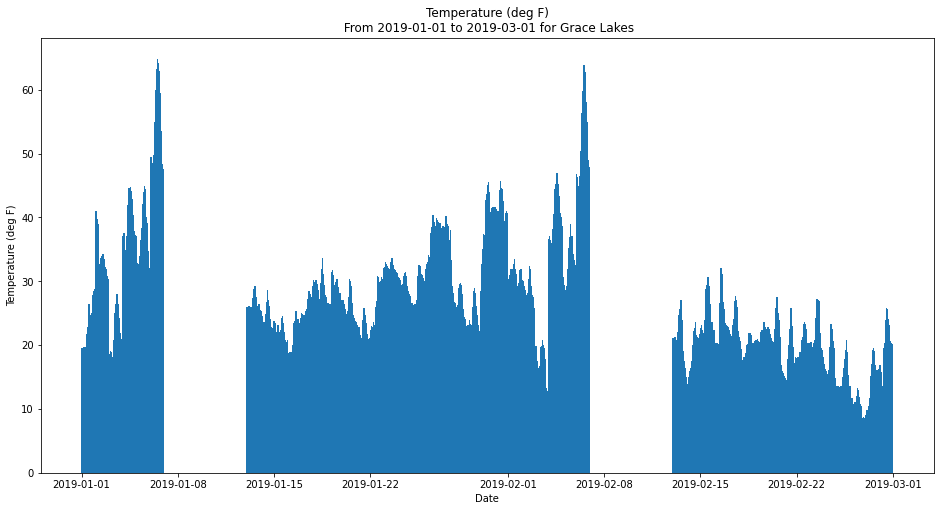

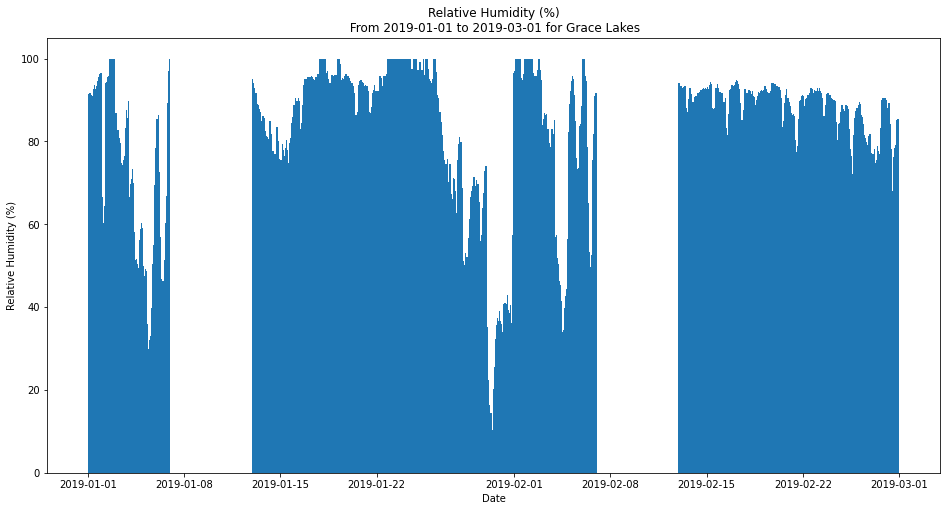

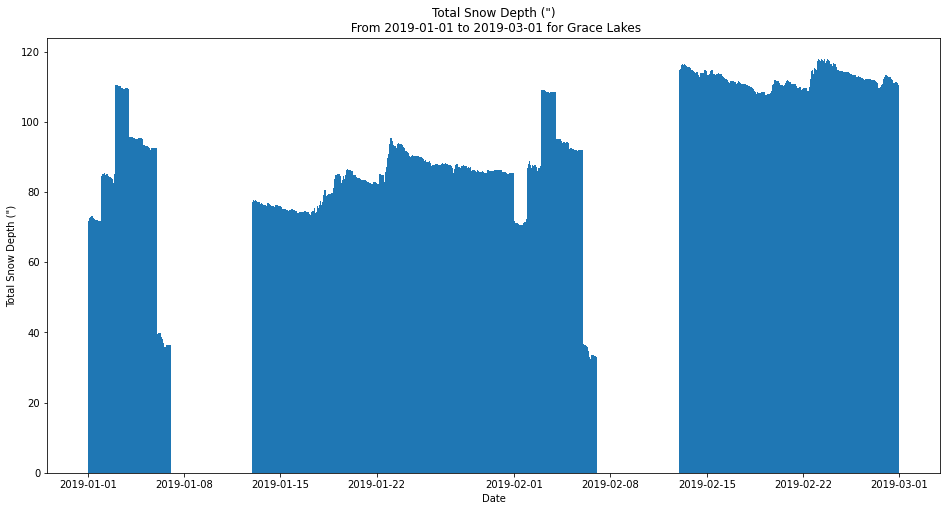

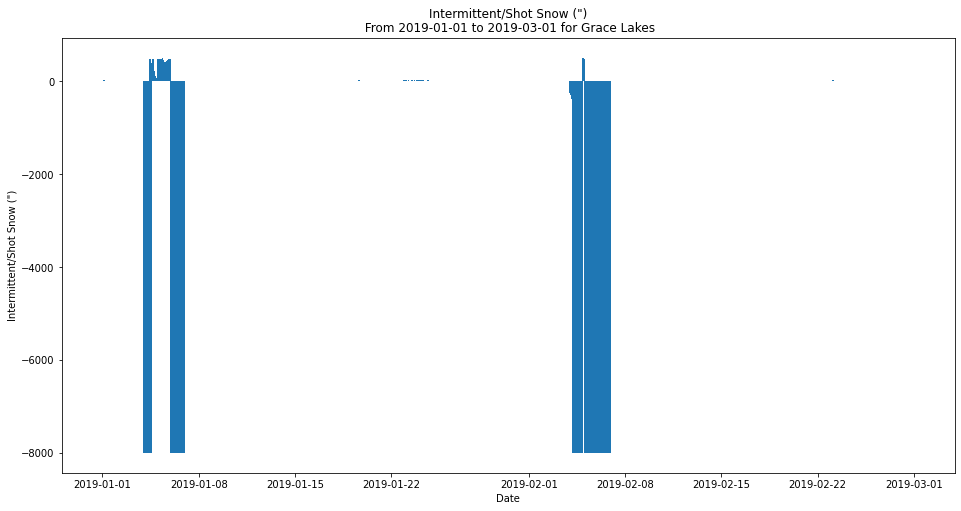

In [9]:
for i in df_features.columns[1:]:
  plot_time_series('Date/Time (PST)',i,'2019-01-01','2019-03-01')


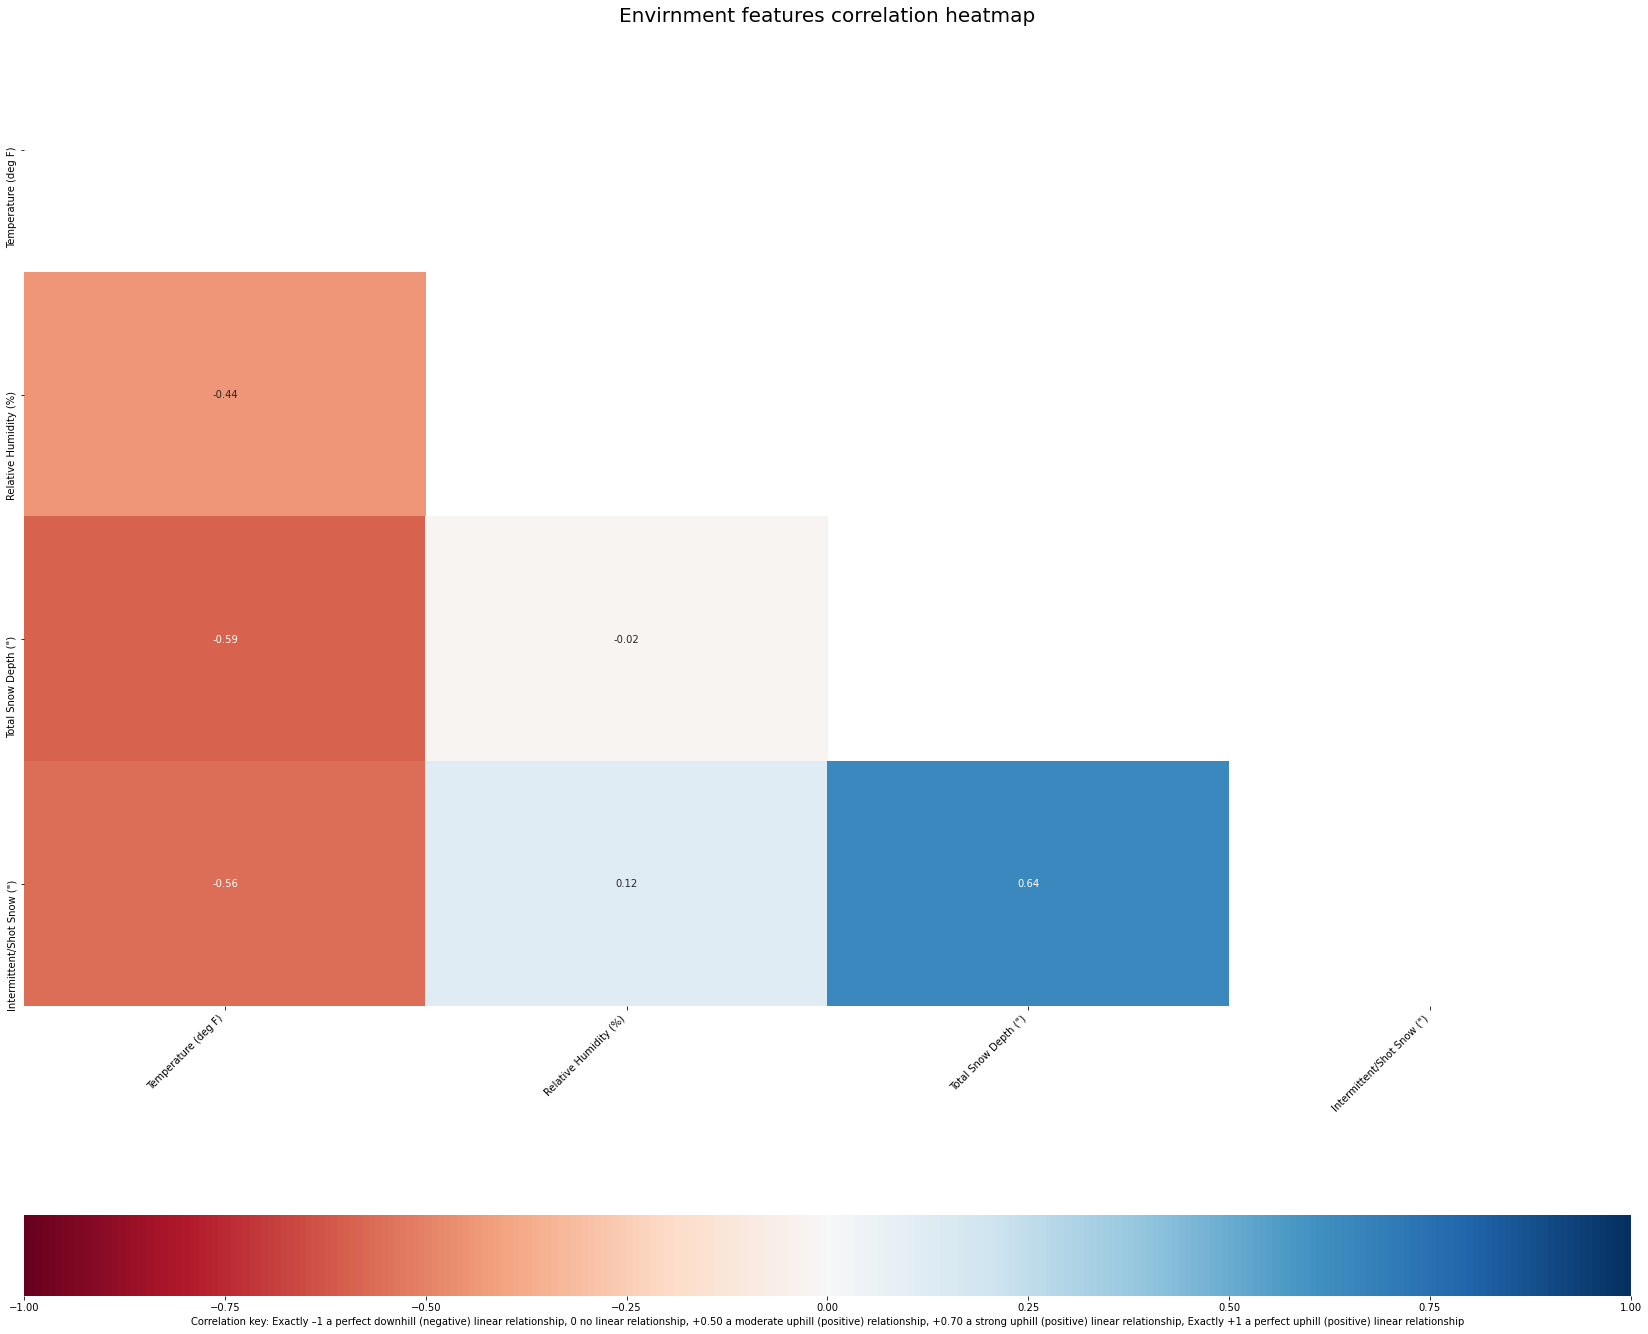

In [10]:
df_correlation = df_features.corr()


mask = np.zeros_like(df_correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# correlation matrix
f, ax = plt.subplots(figsize=(23, 20))
sns.heatmap(df_correlation, vmax=1, vmin = -1, center = 0, cmap='RdBu', mask=mask, annot = True, fmt="0.2f",robust=True, cbar_kws={'label':
        'Correlation key: Exactly –1 a perfect downhill (negative) linear relationship, 0 no linear relationship,'
        ' +0.50 a moderate uphill (positive) relationship, +0.70 a strong uphill (positive) linear relationship,'
        ' Exactly +1 a perfect uphill (positive) linear relationship', 'orientation': 'horizontal'})

# ax.set(xlabel="Envirnment features", ylabel="Envirnment features")
ax.set_title(label='Envirnment features correlation heatmap',fontsize=20)

plt.setp( ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()


**Data engeneering**

In [11]:
df_features['Total Snow Depth Dayly Difference'] = df_features['Total Snow Depth (")'].diff()
print(df_features ['Total Snow Depth Dayly Difference'].describe())


count    4215.000000
mean       -0.014482
std         5.527211
min      -115.200000
25%        -0.300000
50%         0.000000
75%         0.200000
max       118.800000
Name: Total Snow Depth Dayly Difference, dtype: float64


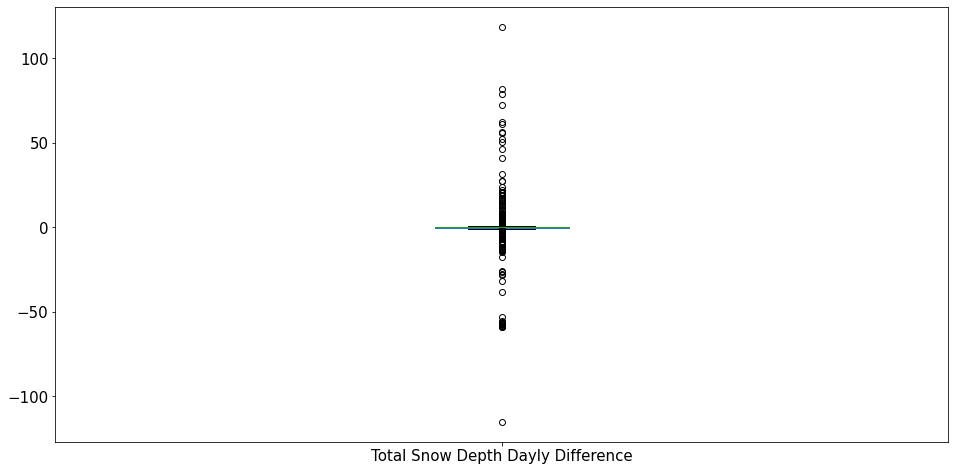

In [12]:
fig, ax = plt.subplots(figsize=(16, 8))
df_features['Total Snow Depth Dayly Difference'].plot.box(fontsize=15)

In [17]:
from sklearn.cluster import DBSCAN

X = pd.DataFrame(df_features['Total Snow Depth Dayly Difference'])
X.fillna(value = 0,inplace=True)

#arbitrary substitution to detect only drop of snow level
X.loc[X['Total Snow Depth Dayly Difference'] > 5, 'Total Snow Depth Dayly Difference'] = 0

clustering = DBSCAN(eps=3, min_samples=15).fit(X)
df_features['Snow instability labels'] = clustering.labels_



**Visual exploration if significant drop of snow level was classified correctly**

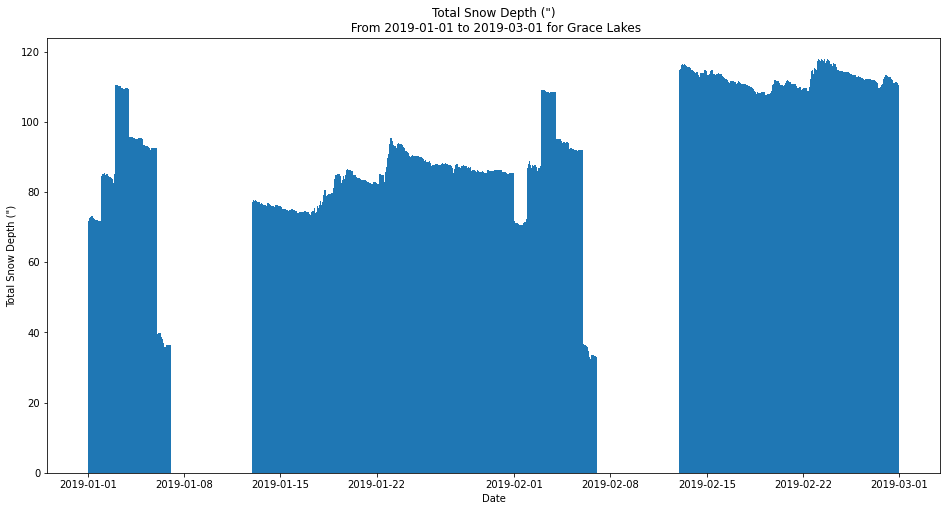

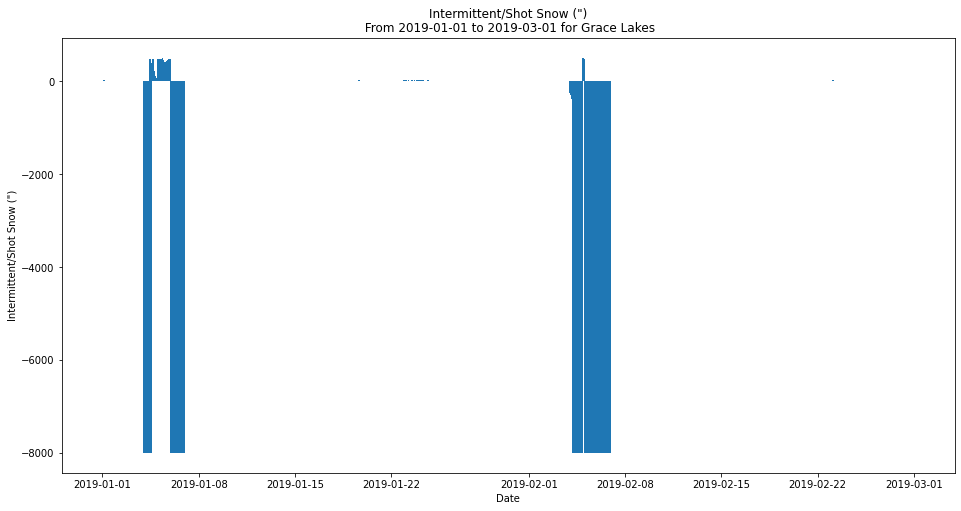

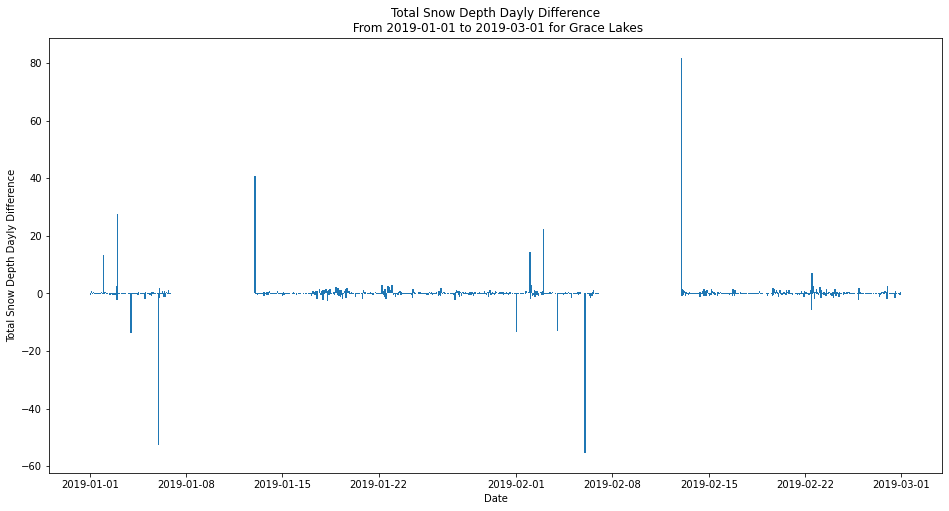

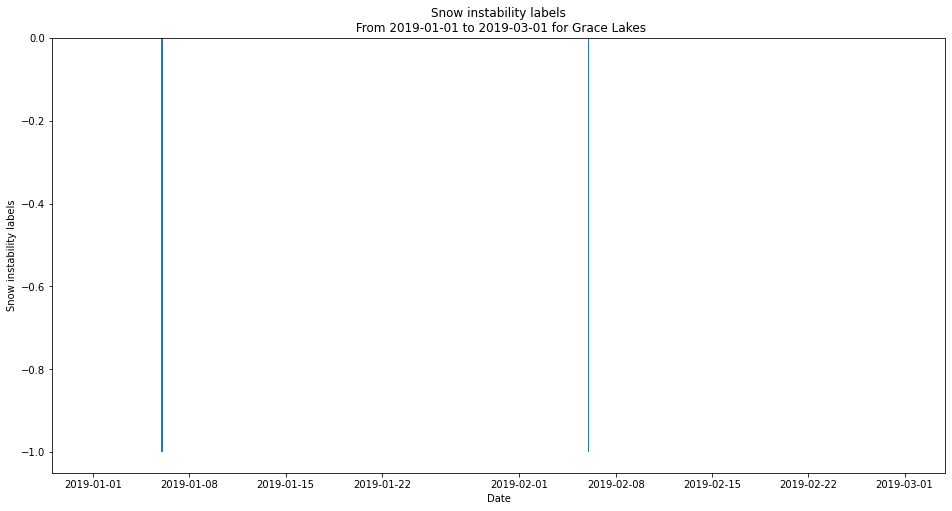

In [19]:
for i in df_features.columns[3:]:
  plot_time_series('Date/Time (PST)',i,'2019-01-01','2019-03-01')

In [18]:
df_features.groupby('Snow instability labels').size()

Snow instability labels
-1      20
 0    4196
dtype: int64

**Save enhanced data set for further avalanche predictions**


In [21]:
df_features.to_csv('/content/enhanced_StevensPass-GraceLakes_4790_feet_2019.csv')